In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='dark', palette='muted')

In [3]:
train_raw = pd.read_csv('train_ctrUa4K.csv')
test_raw = pd.read_csv('test_lAUu6dG.csv')

In [4]:
train_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_raw.shape

(614, 13)

In [6]:
train_raw.drop('Loan_ID', axis=1, inplace=True)
test_raw.drop('Loan_ID', axis=1, inplace=True)

Jumlah class Y: 422
Jumlah class N: 192


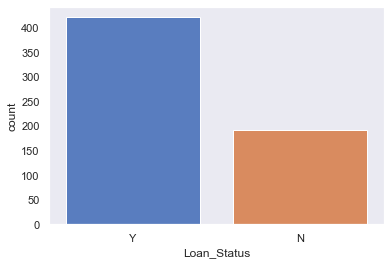

In [7]:
Y, N = train_raw['Loan_Status'].value_counts()
print('Jumlah class Y:', Y)
print('Jumlah class N:', N)
sns.countplot(train_raw.Loan_Status)
plt.show()

In [8]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
train_raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train_raw.isna().sum()/train_raw.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
train_raw[['Credit_History', 'Loan_Amount_Term']] = train_raw[['Credit_History', 'Loan_Amount_Term']].astype('str')
numerical_cols = [col for col in train_raw.columns if train_raw[col].dtype != 'object']
categorical_cols = [col for col in train_raw.columns if train_raw[col].dtype == 'object']
categorical_cols.remove('Loan_Status')

In [12]:
numerical_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [13]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [14]:
train_raw.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


<AxesSubplot:xlabel='features', ylabel='value'>

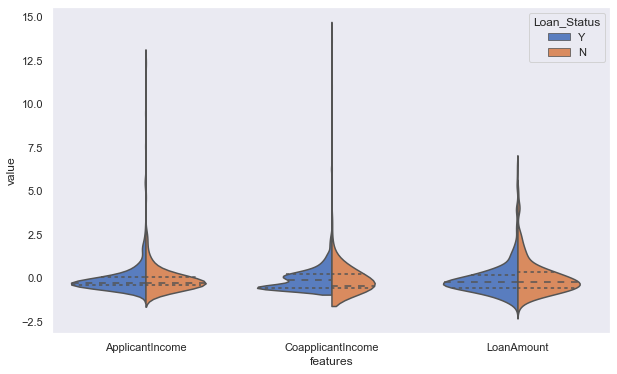

In [15]:
data = train_raw[numerical_cols]
data = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([train_raw['Loan_Status'], data], axis=1)
data = pd.melt(data,id_vars="Loan_Status",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))
sns.violinplot(x="features", y="value", hue="Loan_Status", data=data,split=True, inner="quart")

<AxesSubplot:xlabel='features', ylabel='value'>

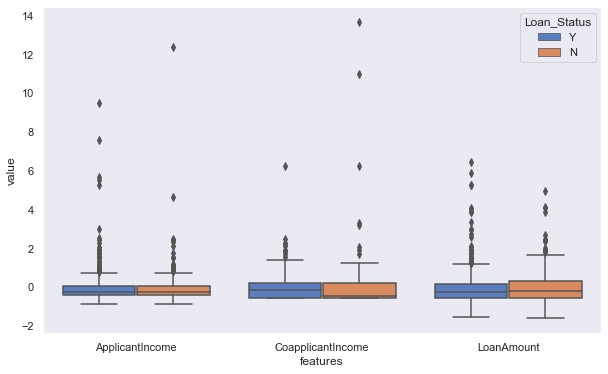

In [16]:
data = train_raw[numerical_cols]
data = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([train_raw['Loan_Status'], data], axis=1)
data = pd.melt(data,id_vars="Loan_Status",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="Loan_Status", data=data)

In [17]:
train_raw.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

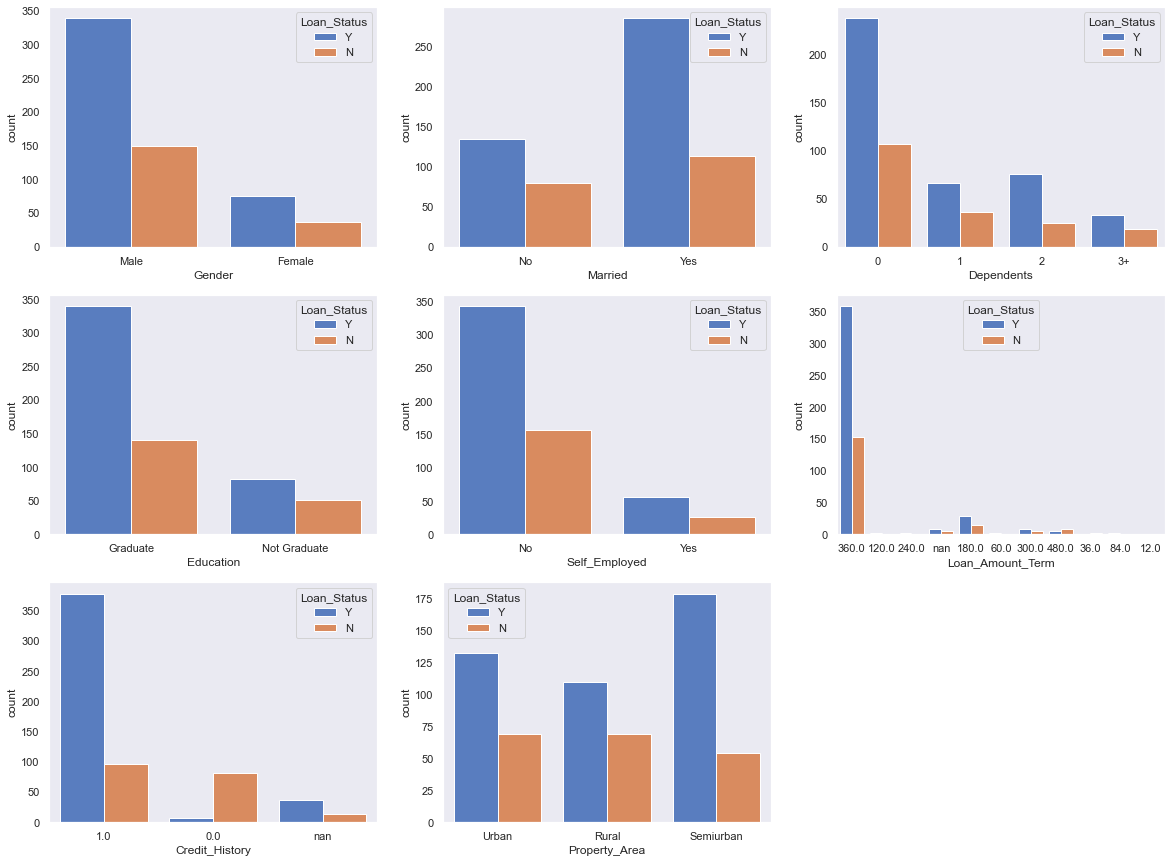

In [18]:
plt.figure(figsize=(20,15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(col, hue='Loan_Status', data=train_raw)

## Preprocessing

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, cross_validate
from xgboost import XGBClassifier

In [20]:
X = train_raw.drop('Loan_Status', axis=1)
y = train_raw['Loan_Status']
X_test = test_raw


### Missing Value

In [21]:
na_col = pd.DataFrame(X.isna().sum()) 
na_col.columns = ['NA Train']
na_col['NA Test'] = X_test.isna().sum().values 
round(na_col, 2)

,NA Train,NA Test
Gender,13,11
Married,3,0
Dependents,15,10
Education,0,0
Self_Employed,32,23
ApplicantIncome,0,0
CoapplicantIncome,0,0
LoanAmount,22,5
Loan_Amount_Term,0,6
Credit_History,0,29


In [22]:
def plot_dist(data, cols, set_name):
    plt.figure(figsize=(20,4))
    for i, col in enumerate(cols):
        plt.subplot(1,3,i+1)
        sns.distplot(data[col], kde=False)
        plt.title(col + ' distribution in ' + set_name)

In [23]:
def feature_enginering(data):
    data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
    data['TotalIncome'] = np.log(data['TotalIncome'])
    data['LoanAmount'] = np.log(data['LoanAmount'])

    data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
    return data

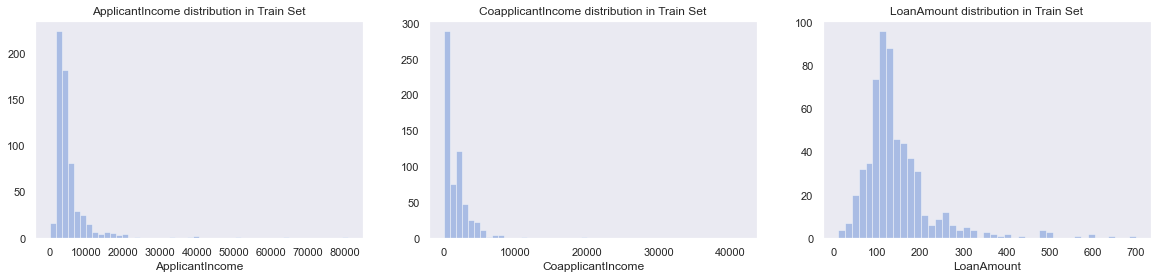

In [24]:
plot_dist(X, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], 'Train Set')

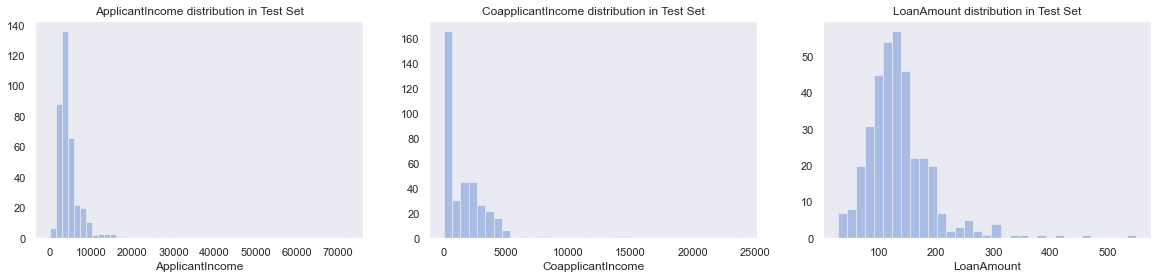

In [25]:
plot_dist(X_test, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], 'Test Set')

In [26]:
X = feature_enginering(X)
X_test = feature_enginering(X_test)

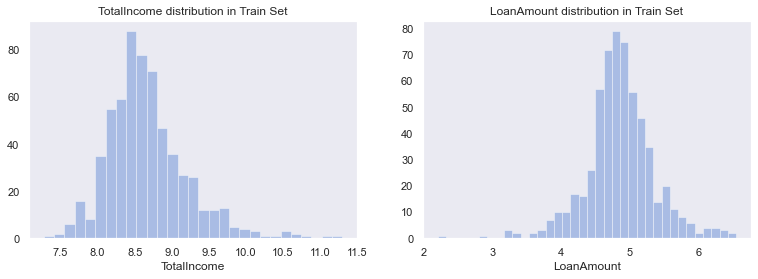

In [27]:
plot_dist(X, ['TotalIncome', 'LoanAmount'], 'Train Set')

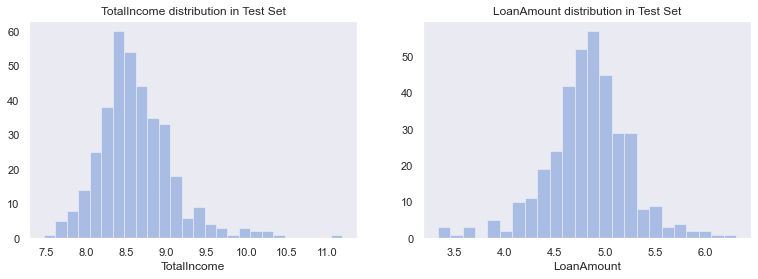

In [28]:
plot_dist(X_test, ['TotalIncome', 'LoanAmount'], 'Test Set')

In [29]:
y = train_raw['Loan_Status']
y = LabelEncoder().fit_transform(y)

## Pipeline

In [30]:
numerical_cols = [col for col in X.columns if X[col].dtype != 'object']
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

cat_binnary_col = [col for col in X[categorical_cols].columns if X[col].nunique() == 2]
cat_onehot_col = [col for col in X[categorical_cols].columns if X[col].nunique() > 2]

In [31]:
print(numerical_cols)
print(cat_binnary_col)
print(cat_onehot_col)

['LoanAmount', 'TotalIncome']
['Gender', 'Married', 'Education', 'Self_Employed']
['Dependents', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [32]:
numerical_transformer = SimpleImputer(strategy='median')

categorical_binnary = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', ce.OrdinalEncoder())
])

categorical_onehot = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat_bin', categorical_binnary, cat_binnary_col),
    ('cat_oh', categorical_onehot, cat_onehot_col)
])

In [33]:
X_clean = preprocessor.fit_transform(X)
X_test_clean = preprocessor.transform(X_test)

In [34]:
X_clean.shape, X_test_clean.shape

((614, 27), (367, 27))

In [48]:
X_train, X_2, y_train, y_2 = train_test_split(X_clean, y, test_size=0.2, random_state=0)
X_valid, X_tes, y_valid, y_tes = train_test_split(X_2, y_2, test_size=0.5, random_state=0)

In [49]:
X_train.shape, X_valid.shape

((491, 27), (61, 27))

In [56]:
import lightgbm as lgb

dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_valid, label=y_valid)
dtest = lgb.Dataset(X_tes, label=y_tes)

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10)

[LightGBM] [Info] Number of positive: 332, number of negative: 159
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676171 -> initscore=0.736231
[LightGBM] [Info] Start training from score 0.736231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.727444
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.738095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.774436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]

In [57]:
from sklearn import metrics

ypred = bst.predict(X_tes)
score = metrics.roc_auc_score(y_tes, ypred)
print(f"Test score: {score}")

Test score: 0.7157738095238095


In [62]:
bst.predict(X_test_clean)

array([0.76236108, 0.6381696 , 0.6764879 , 0.62195768, 0.65655933,
       0.68274936, 0.56872358, 0.67568713, 0.68675379, 0.8531724 ,
       0.68457192, 0.6753483 , 0.85454003, 0.72151911, 0.8531724 ,
       0.7919382 , 0.65705747, 0.72934953, 0.58485471, 0.8185591 ,
       0.7921918 , 0.56872358, 0.79893173, 0.7814139 , 0.61002654,
       0.68712742, 0.81580075, 0.59089657, 0.79867692, 0.81476399,
       0.55792265, 0.65705747, 0.75219467, 0.78685759, 0.79970513,
       0.57753847, 0.72650212, 0.68484755, 0.83700151, 0.79100046,
       0.75093792, 0.79039425, 0.83850131, 0.64385655, 0.7392394 ,
       0.71612416, 0.65644933, 0.83557671, 0.64385655, 0.76177692,
       0.82614082, 0.85743319, 0.69748112, 0.77260495, 0.7282848 ,
       0.67364315, 0.68478551, 0.75134273, 0.64278988, 0.81153719,
       0.84053754, 0.79583226, 0.68482492, 0.71588589, 0.75169892,
       0.7516232 , 0.69994703, 0.7128511 , 0.64107396, 0.63841081,
       0.77932822, 0.66857114, 0.80119112, 0.73655135, 0.73779

In [61]:
submit = pd.read_csv('test_lAUu6dG.csv')

preds_test = bst.predict(X_test_clean)
output = pd.DataFrame({'Loan_ID': submit['Loan_ID'],
                       'Loan_Status': preds_test})
mapping = {1:'Y', 0:'N'}
output['Loan_Status'] = output['Loan_Status'].map(mapping)
output.to_csv('submission_ver2.csv', index=False)